<a href="https://colab.research.google.com/github/aayushrai/NLP/blob/master/Tensorflow/IMDB_Subwords_8K_with_Single_Layer_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
print(tf.__version__)

2.2.0


In [2]:
dataset,info = tfds.load("imdb_reviews/subwords8k",with_info=True,as_supervised=True)
train_dataset,test_dataset = dataset["train"],dataset["test"]

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteLHHYZP/imdb_reviews-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteLHHYZP/imdb_reviews-test.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteLHHYZP/imdb_reviews-unsupervised.tfrecord


Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0. Subsequent calls will reuse this data.


In [3]:
tokenizer = info.features['text'].encoder

In [4]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

train_dataset = train_dataset.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(train_dataset))
test_dataset = test_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(test_dataset))

In [5]:
model = tf.keras.Sequential([
        tf.keras.layers.Embedding(tokenizer.vocab_size,64),
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
        tf.keras.layers.Dense(64,activation="relu"), 
        tf.keras.layers.Dense(1,activation="sigmoid")                    
                             ])

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          523840    
_________________________________________________________________
bidirectional (Bidirectional (None, 128)               66048     
_________________________________________________________________
dense (Dense)                (None, 64)                8256      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 598,209
Trainable params: 598,209
Non-trainable params: 0
_________________________________________________________________


In [7]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [8]:
NUM_EPOCHS = 10
history = model.fit(train_dataset, epochs=NUM_EPOCHS, validation_data=test_dataset)

Epoch 1/10
391/391 [==============================] - 59s 152ms/step - loss: 0.5131 - accuracy: 0.7432 - val_loss: 0.4921 - val_accuracy: 0.7717
Epoch 2/10
391/391 [==============================] - 59s 151ms/step - loss: 0.4339 - accuracy: 0.8124 - val_loss: 0.4643 - val_accuracy: 0.7839
Epoch 3/10
391/391 [==============================] - 60s 153ms/step - loss: 0.3079 - accuracy: 0.8790 - val_loss: 0.4994 - val_accuracy: 0.8295
Epoch 4/10
391/391 [==============================] - 59s 151ms/step - loss: 0.3291 - accuracy: 0.8657 - val_loss: 0.4199 - val_accuracy: 0.8337
Epoch 5/10
391/391 [==============================] - 61s 155ms/step - loss: 0.2433 - accuracy: 0.9088 - val_loss: 0.5399 - val_accuracy: 0.7969
Epoch 6/10
391/391 [==============================] - 59s 151ms/step - loss: 0.2236 - accuracy: 0.9178 - val_loss: 0.4749 - val_accuracy: 0.8384
Epoch 7/10
391/391 [==============================] - 59s 151ms/step - loss: 0.1760 - accuracy: 0.9366 - val_loss: 0.5350 - val_ac

In [9]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

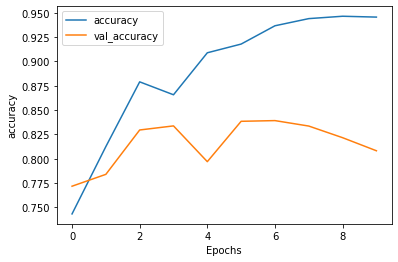

In [10]:
plot_graphs(history, 'accuracy')

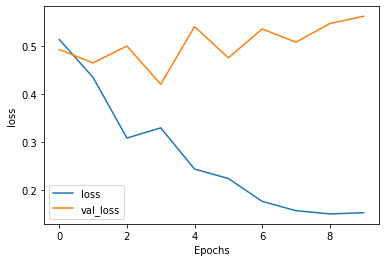

In [11]:

plot_graphs(history, 'loss')